In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import Word, TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [10]:
df = pd.read_csv('data/wiki_data.csv')

df = df[0:1000]

In [12]:
#metin temizleme fonksiyonu
def clean_text(text):
    # Harfleri Küçültme
    text = text.str.lower()
    # Noktalama İşaretleri
    text = text.str.replace(r'[^\w\s]', '', regex = True)
    text = text.str.replace("\n", '', regex = True)
    # Sayıları Kaldırma
    text = text.str.replace('\d', '', regex = True)
    return text

In [13]:
df['text'] = clean_text(df['text'])

In [14]:
#stopwords fonksiyonu
def remove_stopwords(text):
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

In [15]:
#Stopwords Silme
df['text'] = remove_stopwords(df['text'])

In [16]:
df

,Unnamed: 0,text
0,1,anovoanovo formerly novo computer services com...
1,2,battery indicatora battery indicator also know...
2,3,bob peaserobert allen pease august â â june an...
3,4,cavnetcavnet secure military forum became oper...
4,5,clidarthe clidar scientific instrument used me...
...,...,...
995,996,coat rackcoat rack coat stand hatstand item fu...
996,997,computeraided maintenancecomputeraided mainten...
997,998,copperii azidecopperii azide medium density ex...
998,999,cosmetovigilancecosmetovigilance ongoing syste...


In [17]:
#En az kullanılan 1000 kelimeyi kaldırma
pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

rw = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

df['text'] = df['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in rw))

In [18]:
#tokenizasyon
df['text'].apply(lambda x: TextBlob(x).words)

0      [anovoanovo, formerly, novo, computer, service...
1      [battery, indicatora, battery, indicator, also...
2      [bob, peaserobert, allen, pease, august, â, â,...
3      [cavnetcavnet, secure, military, forum, became...
4      [clidarthe, clidar, scientific, instrument, us...
                             ...                        
995    [coat, rackcoat, rack, coat, stand, hatstand, ...
996    [computeraided, maintenancecomputeraided, main...
997    [copperii, azidecopperii, azide, medium, densi...
998    [cosmetovigilancecosmetovigilance, ongoing, sy...
999    [cultural, probecultural, probes, design, prob...
Name: text, Length: 1000, dtype: object

In [19]:
#lemmatizasyon
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [25]:
#Terim Sıklığı
tf = df['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)

,words,tf
37,used,2623.0
49,system,2291.0
58,also,2078.0
596,one,1526.0
356,first,1456.0
...,...,...
27519,symptomatic,1.0
11145,boardtobackplane,1.0
27516,exerciseartificial,1.0
27515,gforces,1.0


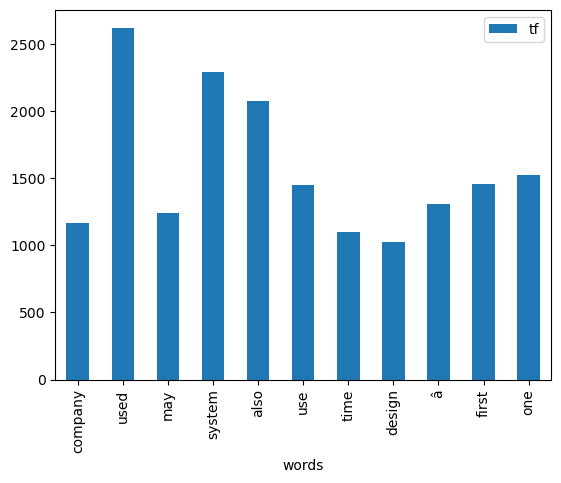

In [27]:
#barplot
tf[tf["tf"] > 1000].plot.bar(x='words', y='tf')

plt.show()

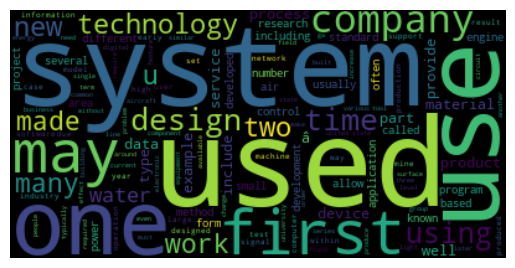

In [28]:
#wordcloud
text = " ".join(i for i in df.text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
def wiki_preprocess(text, Barplot=False, Wordcloud=False):
    """
    Textler üzerinde ön işleme işlemleri yapar.

    :param text: DataFrame'deki textlerin olduğu değişken
    :param Barplot: Barplot görselleştirme
    :param Wordcloud: Wordcloud görselleştirme
    :return: text


    Example:
            wiki_preprocess(dataframe[col_name])

    """
    
    # Harfleri Küçültme
    text = text.str.lower()
    # Noktalama İşaretleri
    text = text.str.replace(r'[^\w\s]', '', regex = True)
    text = text.str.replace("\n", '', regex = True)
    # Sayıları Kaldırma
    text = text.str.replace('\d', '', regex = True)
    # Stopwords Kaldırma
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    # Rarewords
    rw = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in rw))
    
    
    if Barplot:
        tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
        tf.columns = ["words", "tf"]
        tf[tf["tf"] > 1000].plot.bar(x="words", y="tf")
        plt.show()
        
    if Wordcloud:
        text = " ".join(i for i in text)
        wordcloud = WordCloud(max_font_size=50,
                              max_words=100,
                              background_color="white").generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
        
    return text

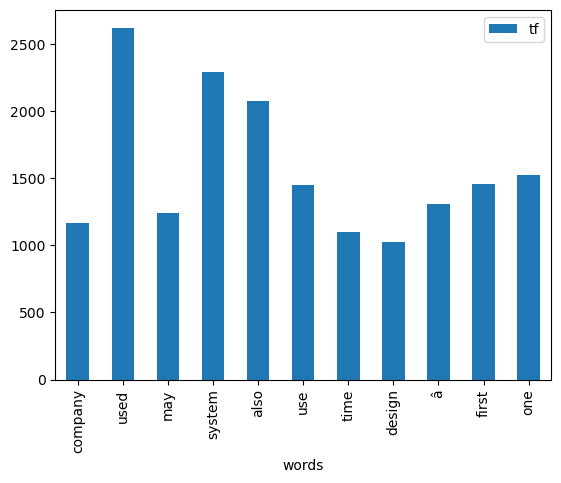

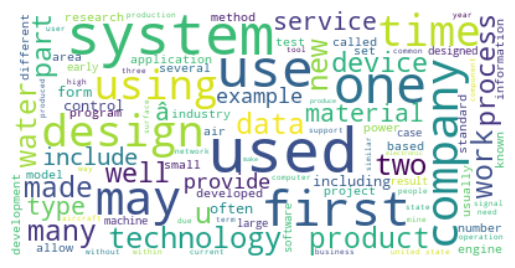

'anovoanovo formerly novo computer service company based beauvais france founded went public currently member cac smallit category service repair mobile news award four year row november score trustpilot rating site reviewer giving company lowest possible rating battery indicatora battery indicator also known battery gauge device give information battery usually visual indication battery state charge particularly important case battery electric vehiclesome automobile fitted battery condition meter monitor starter battery meter essentially voltmeter may also marked coloured zone easy visualization many newer car longer offer voltmeter ammeter instead vehicle typically light outline automotive battery somewhat misleading may confused indicator bad battery reality indicates problem vehicle charging system alternatively ammeter may fitted indicates whether battery charged discharged adjacent picture ammeter marked alternator symbol c charge discharge ammeter voltmeter individually together

In [30]:
wiki_preprocess(df['text'], True, True)